In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings("ignore")

In [2]:
# Data loading
train_df = pd.read_csv("train.csv", index_col=0)
test_df = pd.read_csv('test.csv', index_col=0)
train_df.shape,test_df.shape

((1460, 80), (1459, 79))

In [3]:
# Viewing missing Values
total_train = train_df.isnull().sum().sort_values(ascending=False)
percent = (train_df.isnull().sum() / train_df.isnull().count()).sort_values(ascending=False)
missing_traindata = pd.concat([total_train, percent], axis=1, keys=['Total', 'Percent'])
print(missing_traindata.head(20))

              Total   Percent
PoolQC         1453  0.995205
MiscFeature    1406  0.963014
Alley          1369  0.937671
Fence          1179  0.807534
FireplaceQu     690  0.472603
LotFrontage     259  0.177397
GarageType       81  0.055479
GarageCond       81  0.055479
GarageFinish     81  0.055479
GarageQual       81  0.055479
GarageYrBlt      81  0.055479
BsmtFinType2     38  0.026027
BsmtExposure     38  0.026027
BsmtQual         37  0.025342
BsmtCond         37  0.025342
BsmtFinType1     37  0.025342
MasVnrArea        8  0.005479
MasVnrType        8  0.005479
Electrical        1  0.000685
RoofMatl          0  0.000000


In [4]:
total_test = test_df.isnull().sum().sort_values(ascending=False)
percent = (test_df.isnull().sum() / test_df.isnull().count()).sort_values(ascending=False)
missing_testdata = pd.concat([total_test, percent], axis=1, keys=['Total', 'Percent'])
print(missing_testdata.head(20))

              Total   Percent
PoolQC         1456  0.997944
MiscFeature    1408  0.965045
Alley          1352  0.926662
Fence          1169  0.801234
FireplaceQu     730  0.500343
LotFrontage     227  0.155586
GarageCond       78  0.053461
GarageFinish     78  0.053461
GarageYrBlt      78  0.053461
GarageQual       78  0.053461
GarageType       76  0.052090
BsmtCond         45  0.030843
BsmtExposure     44  0.030158
BsmtQual         44  0.030158
BsmtFinType1     42  0.028787
BsmtFinType2     42  0.028787
MasVnrType       16  0.010966
MasVnrArea       15  0.010281
MSZoning          4  0.002742
BsmtHalfBath      2  0.001371


In [5]:
# Deletes features with missing values greater than 15%
new_train_df = train_df.drop((missing_traindata[missing_traindata['Percent'] > 0.15]).index, 1)
new_test_df = test_df.drop((missing_testdata[missing_testdata['Percent'] > 0.15]).index, 1)

In [6]:
new_train_df.isnull().sum().sort_values(ascending=False)

GarageType       81
GarageYrBlt      81
GarageFinish     81
GarageQual       81
GarageCond       81
                 ..
1stFlrSF          0
CentralAir        0
HeatingQC         0
SaleCondition     0
MSSubClass        0
Length: 74, dtype: int64

In [7]:
new_test_df.isnull().sum().sort_values(ascending=False)

GarageQual      78
GarageCond      78
GarageYrBlt     78
GarageFinish    78
GarageType      76
                ..
2ndFlrSF         0
1stFlrSF         0
Electrical       0
CentralAir       0
MSSubClass       0
Length: 73, dtype: int64

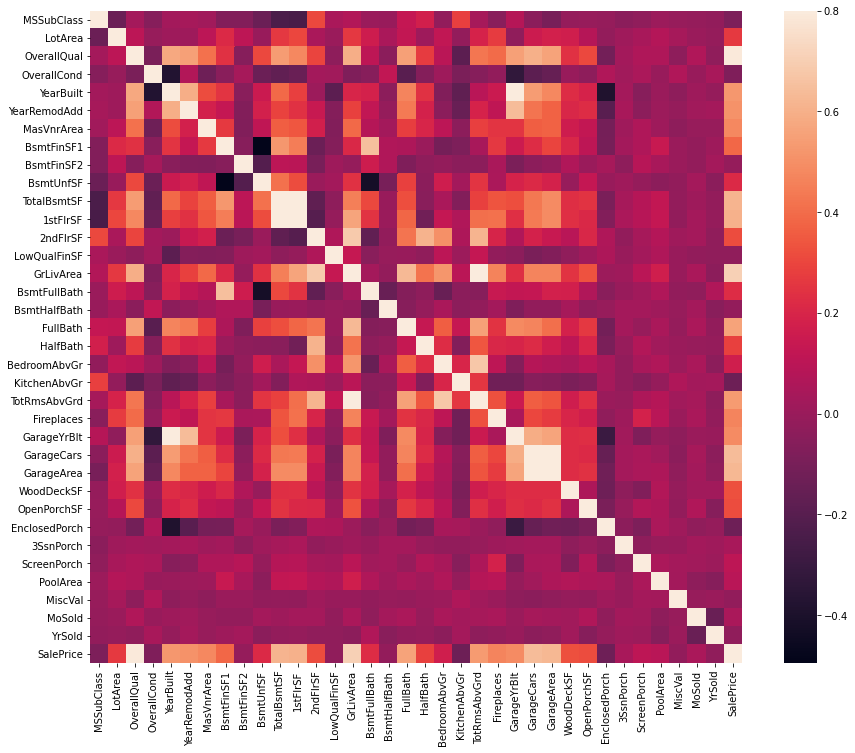

In [8]:
# Correlation matrix
f , ax = plt.subplots(figsize=(15,12))
sns.heatmap(new_train_df.corr(), vmax=0.8, square=True)

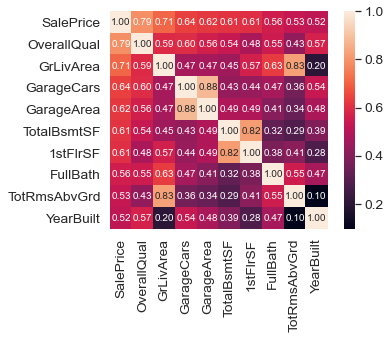

In [9]:
# SalePrice correlation matrix 
k = 10
cols = new_train_df.corr().nlargest(k,'SalePrice')['SalePrice'].index
cm = np.corrcoef(new_train_df[cols].values.T)
sns.set(font_scale = 1.25)
sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size':10}, 
            yticklabels=cols.values, xticklabels=cols.values)

In [10]:
# Set the target to 'SalePrice'
y_train = new_train_df.pop('SalePrice')

In [11]:
# New training set and test set after processing
new_train_df.shape,new_test_df.shape

((1460, 73), (1459, 73))

In [12]:
# Non-object columns in the training set
train_numerico_cols = new_train_df.columns[new_train_df.dtypes != 'object']
train_numerico_cols

Index(['MSSubClass', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt',
       'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF',
       'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea',
       'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr',
       'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt',
       'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal',
       'MoSold', 'YrSold'],
      dtype='object')

In [13]:
# Object columns in the training set
train_nonnumeric_cols = new_train_df.columns[new_train_df.dtypes == 'object']
train_nonnumeric_cols

Index(['MSZoning', 'Street', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
       'Functional', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond',
       'PavedDrive', 'SaleType', 'SaleCondition'],
      dtype='object')

In [14]:
#From the correlation matrix found that OverallQual has a good correlation with SalePrice, it is used as a label
new_train_df['Label'] = new_train_df['OverallQual'] > new_train_df['OverallQual'].mean()
new_train_df['Label'] = new_train_df['Label'].astype(int)

In [15]:
#  Define greedy target encoding
def greedy_target_encoding(df, column, label, p):
    # Compute the global mean
    mean = df[label].mean()

    # Compute the number of values and the mean of each group
    agg = df.groupby(column)[label].agg(['count', 'mean'])
    counts = agg['count']
    means = agg['mean']

    # Compute the "smoothed" means
    smooth = (counts * means + p * mean) / (counts + p)

    # Replace each value by the according smoothed mean
    return df[column].map(smooth)

In [16]:
# Encode object features in the training set
for i in range(len(train_nonnumeric_cols)):
    new_train_df[train_nonnumeric_cols[i]] = greedy_target_encoding(new_train_df, column=new_train_df.columns[i], label='Label', p=10)

In [17]:
# Delete 'Label' from training set
new_train_df = new_train_df.drop(columns=['Label'])

In [18]:
# All the encoded features are numerical
new_train_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1460 entries, 1 to 1460
Data columns (total 73 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1460 non-null   int64  
 1   MSZoning       1460 non-null   float64
 2   LotArea        1460 non-null   int64  
 3   Street         1460 non-null   float64
 4   LotShape       1460 non-null   float64
 5   LandContour    1460 non-null   float64
 6   Utilities      1460 non-null   float64
 7   LotConfig      1460 non-null   float64
 8   LandSlope      1460 non-null   float64
 9   Neighborhood   1460 non-null   float64
 10  Condition1     1460 non-null   float64
 11  Condition2     1460 non-null   float64
 12  BldgType       1460 non-null   float64
 13  HouseStyle     1460 non-null   float64
 14  OverallQual    1460 non-null   int64  
 15  OverallCond    1460 non-null   int64  
 16  YearBuilt      1460 non-null   int64  
 17  YearRemodAdd   1460 non-null   int64  
 18  RoofStyl

In [19]:
# The same as above
test_numerico_cols = new_test_df.columns[new_test_df.dtypes != 'object']
test_numerico_cols

Index(['MSSubClass', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt',
       'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF',
       'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea',
       'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr',
       'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt',
       'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal',
       'MoSold', 'YrSold'],
      dtype='object')

In [20]:
test_nonnumeric_cols = new_test_df.columns[new_test_df.dtypes == 'object']
test_nonnumeric_cols

Index(['MSZoning', 'Street', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
       'Functional', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond',
       'PavedDrive', 'SaleType', 'SaleCondition'],
      dtype='object')

In [21]:
new_test_df['Label'] = new_test_df['OverallQual'] > new_test_df['OverallQual'].mean()
new_test_df['Label'] = new_test_df['Label'].astype(int)

In [22]:
for i in range(len(test_nonnumeric_cols)):
    new_test_df[test_nonnumeric_cols[i]] = greedy_target_encoding(new_test_df, column=new_test_df.columns[i], label='Label', p=10)

In [23]:
new_test_df = new_test_df.drop(columns=['Label'])

In [24]:
# Handling missing values, filling with the mean value of existing data for each feature
train_mean_cols = new_train_df.mean()
test_mean_cols = new_test_df.mean()
new_train_df = new_train_df.fillna(train_mean_cols)
new_test_df = new_test_df.fillna(test_mean_cols)

In [25]:
# Standardize numerical data
train_numerico_col_means = train_df.loc[:,train_numerico_cols].mean()
train_numerico_col_std = train_df.loc[:,train_numerico_cols].std()
test_numerico_col_means = test_df.loc[:,test_numerico_cols].mean()
test_numerico_col_std = test_df.loc[:,test_numerico_cols].std()

In [26]:
new_train_df.loc[:,train_numerico_cols] = (new_train_df.loc[:,train_numerico_cols] - train_numerico_col_means) / train_numerico_col_std
new_test_df.loc[:,test_numerico_cols] = (new_test_df.loc[:,test_numerico_cols] - test_numerico_col_means) / test_numerico_col_std

In [27]:
# Convert data to a Numpy Array format to better match SkLearn
new1_train_df = new_train_df.values
new1_test_df = new_test_df.values

In [28]:
# PCA
from sklearn.decomposition import PCA

pca = PCA(n_components=30)
pca.fit(new_train_df)
new1_train_df = pca.transform(new1_train_df)
pca.fit(new_test_df)
new1_test_df = pca.transform(new1_test_df)

In [29]:
# Get eigenvalues (variance explained by each PC) 
pca.explained_variance_ratio_

array([0.22607053, 0.08577906, 0.07073859, 0.05273707, 0.04015467,
       0.03300245, 0.0315837 , 0.03110985, 0.03074022, 0.02926746,
       0.02825995, 0.0267366 , 0.02635242, 0.02465871, 0.02407847,
       0.02320716, 0.02117416, 0.02048601, 0.01912294, 0.01761148,
       0.01690723, 0.01581796, 0.01476266, 0.01343355, 0.01220041,
       0.00896705, 0.00838588, 0.00827138, 0.00690711, 0.00634613])

In [30]:
# The correlation of each feature to the principal component
loadings = pd.DataFrame(pca.components_.T, columns=["PC"+str(i) for i in list(range(1, 30+1))], index=new_train_df.columns)
loadings.head(60)

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,...,PC21,PC22,PC23,PC24,PC25,PC26,PC27,PC28,PC29,PC30
MSSubClass,-0.004280,0.174669,-0.210029,0.222689,0.334712,0.001680,0.209100,-0.015290,0.037951,0.307146,...,-0.140864,-0.031633,0.082404,-0.049272,0.519438,0.200073,-0.251437,-0.017471,0.046384,-0.048957
MSZoning,0.040915,0.002932,-0.042331,0.022371,-0.025503,0.028647,-0.024479,0.015262,-0.002230,-0.000178,...,0.012500,0.003403,-0.021586,0.015889,0.004457,0.016996,0.017472,-0.051436,-0.168221,-0.154034
LotArea,0.103942,-0.027052,0.356397,-0.041577,-0.176743,0.129271,-0.141514,0.088166,-0.139101,-0.141354,...,-0.083138,-0.257620,0.362586,-0.368148,0.436248,-0.031635,-0.153970,-0.166899,-0.058041,0.022957
Street,0.040915,0.002932,-0.042331,0.022371,-0.025503,0.028647,-0.024479,0.015262,-0.002230,-0.000178,...,0.012500,0.003403,-0.021586,0.015889,0.004457,0.016996,0.017472,-0.051436,-0.168221,-0.154034
LotShape,0.015846,-0.002640,-0.009318,-0.003808,-0.005888,-0.002665,0.003069,-0.004219,-0.001613,0.005305,...,-0.003093,-0.001315,0.002415,-0.005587,0.001798,0.001058,-0.003379,-0.001079,0.000910,-0.008179
LandContour,0.040915,0.002932,-0.042331,0.022371,-0.025503,0.028647,-0.024479,0.015262,-0.002230,-0.000178,...,0.012500,0.003403,-0.021586,0.015889,0.004457,0.016996,0.017472,-0.051436,-0.168221,-0.154034
Utilities,0.109832,-0.011541,-0.070174,-0.021657,-0.053180,-0.074135,0.034077,-0.041083,-0.012181,0.056201,...,-0.011901,0.009611,0.020610,-0.046555,0.009660,0.018974,-0.030350,-0.013951,0.035737,0.006032
LotConfig,0.040915,0.002932,-0.042331,0.022371,-0.025503,0.028647,-0.024479,0.015262,-0.002230,-0.000178,...,0.012500,0.003403,-0.021586,0.015889,0.004457,0.016996,0.017472,-0.051436,-0.168221,-0.154034
LandSlope,0.109832,-0.011541,-0.070174,-0.021657,-0.053180,-0.074135,0.034077,-0.041083,-0.012181,0.056201,...,-0.011901,0.009611,0.020610,-0.046555,0.009660,0.018974,-0.030350,-0.013951,0.035737,0.006032
Neighborhood,0.040915,0.002932,-0.042331,0.022371,-0.025503,0.028647,-0.024479,0.015262,-0.002230,-0.000178,...,0.012500,0.003403,-0.021586,0.015889,0.004457,0.016996,0.017472,-0.051436,-0.168221,-0.154034


Text(0.5, 1.0, 'max_depth vs CV Error')

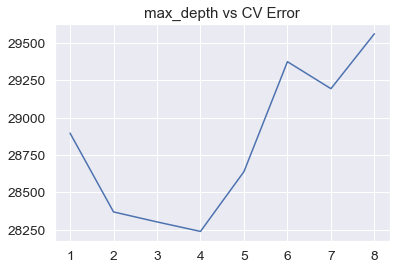

In [31]:
# xgboost
from sklearn.model_selection import cross_val_score
from xgboost import XGBRegressor
params = [1,2,3,4,5,6,7,8]
test_scores = []
for param in params:
    clf = XGBRegressor(max_depth = param)
    test_score = np.sqrt(-cross_val_score(clf,new1_train_df,y_train,cv = 10,scoring = 'neg_mean_squared_error'))
    test_scores.append(np.mean(test_score))
plt.plot(params,test_scores)
plt.title('max_depth vs CV Error')


In [32]:
xgb = XGBRegressor(max_depth = 4)
xgb.fit(new_train_df, y_train)
y_xgb = xgb.predict(new_test_df)

In [33]:
submission_df = pd.DataFrame(data = {'Id':new_test_df.index,'SalePrice':y_xgb})
submission_df.head()

,Id,SalePrice
0,1461,140397.296875
1,1462,145293.390625
2,1463,188250.968750
3,1464,200397.078125
4,1465,187006.671875


In [34]:
submission_df.to_csv('submission_xgb.csv',columns = ['Id','SalePrice'],index = False)

In [35]:
# RandomForest
from sklearn.ensemble import RandomForestRegressor

N_estimators = [20, 50, 100, 150, 200, 260, 300, 350]
test_scores = []
for N in N_estimators:
    clf = RandomForestRegressor(n_estimators=N, max_features=0.3)
    test_score = np.sqrt(-cross_val_score(clf,new_train_df,y_train,cv=5,scoring='neg_mean_squared_error'))
    test_scores.append(np.mean(test_score))

Text(0.5, 1.0, 'N_estimator vs cv Error')

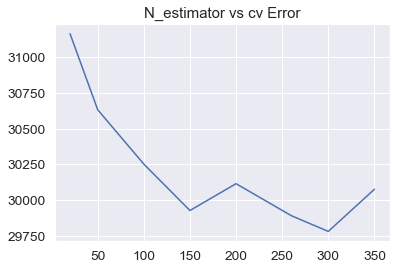

In [36]:
plt.plot(N_estimators,test_scores)
plt.title("N_estimator vs cv Error")

In [63]:
rfr = RandomForestRegressor(n_estimators=300, max_features=0.3)
rfr.fit(new_train_df, y_train)
y_rfr = rfr.predict(new_test_df)

In [64]:
submission_df = pd.DataFrame(data = {'Id':new_test_df.index,'SalePrice':y_rfr})
submission_df.head()

,Id,SalePrice
0,1461,128805.880000
1,1462,153456.000000
2,1463,182298.000000
3,1464,182986.913333
4,1465,204234.880000


In [65]:
submission_df.to_csv('submission_rfr.csv',columns = ['Id','SalePrice'],index = False)

In [40]:
# The average value of the two models is used as the final result
y_final = (y_xgb + y_rfr)/2
submission_df = pd.DataFrame(data={'Id':test_df.index,'SalePrice':y_final})
submission_df.head()
submission_df.to_csv('submission_final.csv',columns = ['Id','SalePrice'],index = False)

In [41]:
### One-hot encoding
# Data loading
train = pd.read_csv("train.csv", index_col=0)
test = pd.read_csv('test.csv', index_col=0)

In [42]:
all_train = train.isnull().sum().sort_values(ascending=False)
percent = (train.isnull().sum() / train.isnull().count()).sort_values(ascending=False)
missing_traindata = pd.concat([all_train, percent], axis=1, keys=['Total', 'Percent'])
print(missing_traindata.head(20))

              Total   Percent
PoolQC         1453  0.995205
MiscFeature    1406  0.963014
Alley          1369  0.937671
Fence          1179  0.807534
FireplaceQu     690  0.472603
LotFrontage     259  0.177397
GarageType       81  0.055479
GarageCond       81  0.055479
GarageFinish     81  0.055479
GarageQual       81  0.055479
GarageYrBlt      81  0.055479
BsmtFinType2     38  0.026027
BsmtExposure     38  0.026027
BsmtQual         37  0.025342
BsmtCond         37  0.025342
BsmtFinType1     37  0.025342
MasVnrArea        8  0.005479
MasVnrType        8  0.005479
Electrical        1  0.000685
RoofMatl          0  0.000000


In [43]:
all_test = test.isnull().sum().sort_values(ascending=False)
percent = (test.isnull().sum() / test.isnull().count()).sort_values(ascending=False)
missing_testdata = pd.concat([all_test, percent], axis=1, keys=['Total', 'Percent'])
print(missing_testdata.head(20))

              Total   Percent
PoolQC         1456  0.997944
MiscFeature    1408  0.965045
Alley          1352  0.926662
Fence          1169  0.801234
FireplaceQu     730  0.500343
LotFrontage     227  0.155586
GarageCond       78  0.053461
GarageFinish     78  0.053461
GarageYrBlt      78  0.053461
GarageQual       78  0.053461
GarageType       76  0.052090
BsmtCond         45  0.030843
BsmtExposure     44  0.030158
BsmtQual         44  0.030158
BsmtFinType1     42  0.028787
BsmtFinType2     42  0.028787
MasVnrType       16  0.010966
MasVnrArea       15  0.010281
MSZoning          4  0.002742
BsmtHalfBath      2  0.001371


In [44]:
# Deletes features with missing values greater than 15%
new_train = train.drop((missing_traindata[missing_traindata['Percent'] > 0.15]).index, 1)
new_test = test.drop((missing_testdata[missing_testdata['Percent'] > 0.15]).index, 1)

In [45]:
all_df = pd.concat((train, test),axis=0)

In [46]:
all_dummy_df = pd.get_dummies(all_df)
all_dummy_df.head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
Id,,,,,,,,,,,,,,,,,,,,,
1,60,65.0,8450,7,5,2003,2003,196.0,706.0,0.0,...,0,0,0,1,0,0,0,0,1,0
2,20,80.0,9600,6,8,1976,1976,0.0,978.0,0.0,...,0,0,0,1,0,0,0,0,1,0
3,60,68.0,11250,7,5,2001,2002,162.0,486.0,0.0,...,0,0,0,1,0,0,0,0,1,0
4,70,60.0,9550,7,5,1915,1970,0.0,216.0,0.0,...,0,0,0,1,1,0,0,0,0,0
5,60,84.0,14260,8,5,2000,2000,350.0,655.0,0.0,...,0,0,0,1,0,0,0,0,1,0


In [47]:
all_dummy_df.isnull().sum().sort_values(ascending=False).head(10)

SalePrice       1459
LotFrontage      486
GarageYrBlt      159
MasVnrArea        23
BsmtHalfBath       2
BsmtFullBath       2
BsmtFinSF2         1
GarageCars         1
TotalBsmtSF        1
BsmtUnfSF          1
dtype: int64

In [48]:
mean_cols = all_dummy_df.mean()
mean_cols.head(10)

MSSubClass         57.137718
LotFrontage        69.305795
LotArea         10168.114080
OverallQual         6.089072
OverallCond         5.564577
YearBuilt        1971.312778
YearRemodAdd     1984.264474
MasVnrArea        102.201312
BsmtFinSF1        441.423235
BsmtFinSF2         49.582248
dtype: float64

In [49]:
all_dummy_df = all_dummy_df.fillna(mean_cols)

In [50]:
numerico_cols = all_df.columns[all_df.dtypes != 'object']
numerico_cols_mean = all_dummy_df.loc[: , numerico_cols].mean()
numerico_cols_std = all_dummy_df.loc[: , numerico_cols].std()
all_dummy_df.loc[: , numerico_cols] = (all_dummy_df.loc[: , numerico_cols] - numerico_cols_mean)/numerico_cols_std

In [51]:
dummy_train_df = all_dummy_df.loc[train.index]
dummy_test_df = all_dummy_df.loc[test.index]

In [52]:
X_train = dummy_train_df.values
X_test = dummy_test_df.values

Text(0.5, 1.0, 'max_depth vs CV Error')

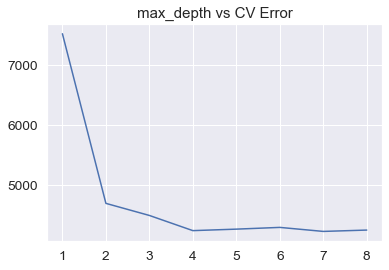

In [53]:
# xgboost
from sklearn.model_selection import cross_val_score
from xgboost import XGBRegressor
params = [1,2,3,4,5,6,7,8]
test_scores = []
for param in params:
    clf = XGBRegressor(max_depth = param)
    test_score = np.sqrt(-cross_val_score(clf,X_train,y_train,cv = 10,scoring = 'neg_mean_squared_error'))
    test_scores.append(np.mean(test_score))
plt.plot(params,test_scores)
plt.title('max_depth vs CV Error')

In [54]:
xgb_oh = XGBRegressor(max_depth = 4)
xgb_oh.fit(X_train, y_train)
y_xgb_oh = xgb_oh.predict(X_test)

In [55]:
submission_df = pd.DataFrame(data = {'Id':test.index,'SalePrice':y_xgb_oh})
submission_df.head()

,Id,SalePrice
0,1461,180741.921875
1,1462,181301.312500
2,1463,181619.328125
3,1464,181251.578125
4,1465,181340.953125


In [56]:
submission_df.to_csv('sub_onehot_xgb.csv',columns = ['Id','SalePrice'],index = False)

In [57]:
# RandomForest
from sklearn.ensemble import RandomForestRegressor

N_estimators = [20, 50, 100, 150, 200, 260, 300, 350]
test_scores = []
for N in N_estimators:
    clf = RandomForestRegressor(n_estimators=N, max_features=0.3)
    test_score = np.sqrt(-cross_val_score(clf,X_train,y_train,cv=5,scoring='neg_mean_squared_error'))
    test_scores.append(np.mean(test_score))

Text(0.5, 1.0, 'N_estimator vs cv Error')

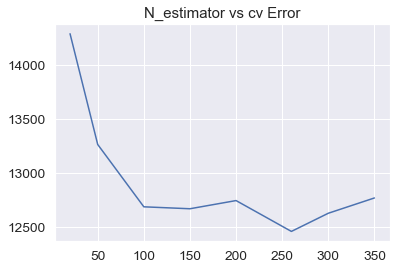

In [58]:
plt.plot(N_estimators,test_scores)
plt.title("N_estimator vs cv Error")

In [66]:
rfr_oh = RandomForestRegressor(n_estimators=260, max_features=0.3)
rfr_oh.fit(X_train, y_train)
y_rfr_oh = rfr_oh.predict(X_test)

In [67]:
submission_df = pd.DataFrame(data = {'Id':test.index,'SalePrice':y_rfr_oh})
submission_df.head()

,Id,SalePrice
0,1461,162862.757692
1,1462,172527.042308
2,1463,179696.169231
3,1464,180829.969231
4,1465,182906.626923


In [68]:
submission_df.to_csv('sub_onehot_rfr.csv',columns = ['Id','SalePrice'],index = False)

In [69]:
# The average value of the two models is used as the final result
y_onehot_final = (y_xgb_oh + y_rfr_oh)/2
submission_df = pd.DataFrame(data={'Id':test.index,'SalePrice':y_final})
submission_df.head()
submission_df.to_csv('sub_onehot_final.csv',columns = ['Id','SalePrice'],index = False)